<table >
    <colgroup>
       <col span="1" style="width: 20%;text-align: left">
       <col span="1" style="width: 20%;text-align: left">
        <col span="1" style="width: 70%;text-align: left">
    </colgroup>
  <td style="background-color: white; vertical-align: top">
   <img src="../../FH_Koblenz.svg" width="100%" float="left"/>
  </td>
  <td style="text-align:left; background-color: white; vertical-align: top; line-height: 0.8;">
    <span style="color:#6e6f72ff;font-size:10px"> Prof. Dr.-Ing. Fábio Bisogno<br>Hochschule Koblenz<br>Fachbereich Ingenieurwesen<br>Elektrotechnik und Informationstechnik<br>E-mail: bisogno@hs-koblenz.de<br>Raum: G078 </span>
  </td>
    <td style="text-align:left; background-color: white; vertical-align: top">
    <span style="color:#6e6f72ff;font-size:10px"> </span>
  </td>
</table>

# Elektronik I

## Aufgaben (d)

<img src="../Ele1-0-Ab04.svg" width="300"/>

10. Entwerfen Sie eine Beispielschaltung mittels der normalisierten Parameter im Frequenzbereich

### Animation

interactive(children=(IntSlider(value=6, description='$K$', max=10, min=1), FloatLogSlider(value=100.0, descri…

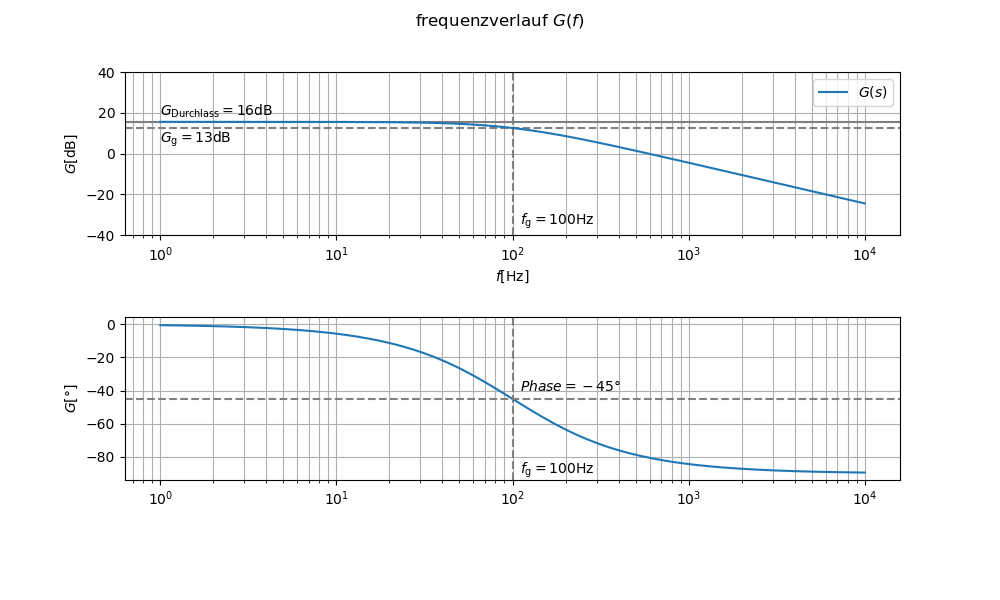

In [2]:
#Animation

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets


# Interaktive Widgets in Jupyter aktivieren
%matplotlib widget

# Zeitarray erstellen
f = np.logspace(0, 4, 200)

# Figur und Achse erstellen
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(left=None, bottom=.2, right=None, top=None, wspace=.5, hspace=.5)
ax0 = fig.add_subplot(2, 1, 1)
ax1 = fig.add_subplot(2, 1, 2)
fig.suptitle('frequenzverlauf $G(f)$')

# Anfangsplot erstellen
p1, = ax0.plot(0, 0)  # Initialisieren des Plots mit (0, 0)
p2, = ax1.plot(0, 0)  # Initialisieren des Plots mit (0, 0)
wt=2*np.pi*f
p1.set_xdata(f)  # Setzen der x-Daten
p2.set_xdata(f)  # Setzen der x-Daten

# Interaktive Funktion mit Schiebereglern definieren
@widgets.interact(K=widgets.IntSlider(value=6, min=1, max=10, description=r'$K$'),
                  fg=widgets.FloatLogSlider(value=100,base=10,min=0,max=4,step=0.2,description=r'$f_\mathrm{g}$'))
def current(K=6, fg=4):
    
    wg=2*np.pi*fg
    
    # kreisfrequenz
    s=1j*wt
    
    # Übertragunsfunktion
    G = K * 1/(s/wg+1)
    
    # Übertragunsfunktion in dB
    GVdB = 20*np.log10(abs(G))
    
    GVPh = np.angle(G,deg=True)
    
    tau=1
    Iao=1

    # Vorherige vertikale Linie löschen und Plot aktualisieren
    ax0.cla()  # Löschen der aktuellen Achse
    ax0.grid(which='both')  # Gitterlinien erneut hinzufügen
    ax0.axvline(fg, color='gray', linestyle='--')  # vertikale Linie
    ax0.axhline(20*np.log10(K), color='gray')  # vertikale Linie
    ax0.axhline(20*np.log10(K)-3, color='gray', linestyle='--')  # vertikale Linie
    ax0.text(1, 20*np.log10(K)-10, r'$G_\mathrm{g} = %.0f \mathrm{dB} $' %(20*np.log10(K)-3), color='black')
    ax0.text(1, 20*np.log10(K)+3, r'$G_\mathrm{Durchlass} = %.0f \mathrm{dB} $' %(20*np.log10(K)), color='black')
    ax0.text(fg+10, -35, r'$f_\mathrm{g} = %.0f \mathrm{Hz} $' %(fg), color='black')
    
    # Vorherige vertikale Linie löschen und Plot aktualisieren
    ax1.cla()  # Löschen der aktuellen Achse
    ax1.grid(which='both')  # Gitterlinien erneut hinzufügen
    ax1.axvline(fg, color='gray', linestyle='--')  # vertikale Linie
    p2, = ax1.plot(f,GVPh, label='$G(s)$')  # Neue Daten plotten
    ax1.axhline(-45, color='gray', linestyle='--')  # vertikale Linie
    #ax0.axhline(20*np.log10(K)-3, color='gray', linestyle='--')  # vertikale Linie
    #ax0.text(1, 20*np.log10(K)-10, r'$G_\mathrm{g} = %.0f \mathrm{dB} $' %(20*np.log10(K)-3), color='black')
    #ax0.text(1, 20*np.log10(K)+3, r'$G_\mathrm{g~Durchlass} = %.0f \mathrm{dB} $' %(20*np.log10(K)), color='black')
    ax1.set_ylabel(r'$G[\mathrm{°}]$')  # y-Achsenbeschriftung
    ax1.set_xscale('log')
    ax1.text(fg+10, -90, r'$f_\mathrm{g} = %.0f \mathrm{Hz} $' %(fg), color='black')
    ax1.text(fg+10, -40, r'$Phase = %.0f \mathrm{°} $' %(-45), color='black')
    
    
    #ax0.text(0.2, Iao * 0.95 - 0.5, r'$0,95 ~ I_\mathrm{ao} = %.2f \mathrm{A} $' % (0.95 * Iao), color='black')
    #ax0.text(0.2, Iao + 0.2, r'$I_\mathrm{ao} = %.2f \mathrm{A} $' % (Iao), color='black')
    p1, = ax0.plot(f,GVdB, label='$G(s)$')  # Neue Daten plotten
    #p1, = ax0.plot([0,tau],[0,Iao], label='Tangente $i_a$', color='gray', linestyle='--')  # Neue Daten plotten
    ax0.set_xlabel(r'$f[\mathrm{Hz}]$')  # x-Achsenbeschriftung
    ax0.set_ylabel(r'$G[\mathrm{dB}]$')  # y-Achsenbeschriftung
    #ax0.set_xlim(1,1e4)  # x-Achsenbereich
    ax0.set_ylim(-40, 40)  # y-Achsenbereich
    ax0.legend()  # Legende hinzufügen, falls nötig
    ax0.set_xscale('log')